# The Farm Problem

John owns a small 45-hectare farm and wants to plant corn and beans.Each hectare of corn generates a profit of US\\$200 and each hectare of beans returns US\\$300 in profit. The number of employees and fertilizers needed for each hectare are described in the table below:

| Worker 1 | Corn | Beans |
| --- | --- | --- |
| Employees | 3 | 2 |
| Fertilizers | 2 Ton | 4 Ton |

Considering that John has 100 employees and 120 tons of fertilizers, how can he maximize his profit?

### Resolution:

**Decision variables:**

    x1 = hectares with corn

    x2 = hectares with beans

    Max profit (L): 200*x1 + 300*x2

**Restrictions:**

    (Area): x1 + x2 = 45

    (Employees): 3*x1 + 2*x2 <= 100

    (Fertilizers): 2*x1 + 4*x2 <= 120

    x1, x2 >= 0

### First le'st visualize the problem parameters

In [6]:
import numpy as np
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

print ('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.3.2


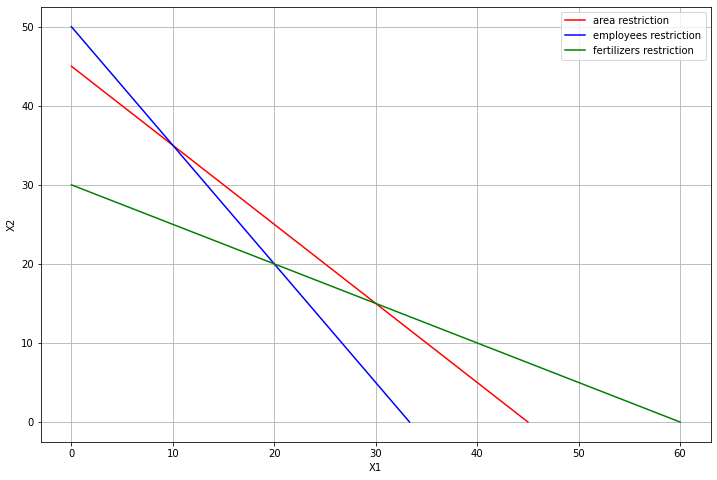

In [2]:
# Aumenta o tamanho do gráfico na proporção 8:5
plt.figure(figsize=(12,8))


# Area restriction
# x2 = -x1 + 45

x1a = [0,45]
x2a = [45,0]

plt.plot(x1a,x2a, 'r', label='area restriction')

# Employees restriction
# x2 = -1.5*x1 + 50

x1e = [0,33.33]
x2e = [50,0]

plt.plot(x1e,x2e, 'b', label='employees restriction')

# Fertilizers restriction
# x2 = -0.5*x1 + 30

x1f = [0,60]
x2f = [30,0]

plt.plot(x1f,x2f, 'g', label='fertilizers restriction')


# Legenda para o eixo X:
plt.xlabel('X1')

# Leganda para o eixo Y:
plt.ylabel('X2')

plt.grid() 
plt.legend()

We found a region. But which of these points is the optimal solution to the problem? What is the most profitable solution?

The solution is one of the **level curves** in the profit equation (L) that **maximizes the area of the graph**.

    Max profit (L): 200*x1 + 300*x2
    
    0 < L < 15000
    
    (L): x2 = -(2/3)*x1
    
Let's plot the **"L curve"** just to get an idea of the slope of the curve:

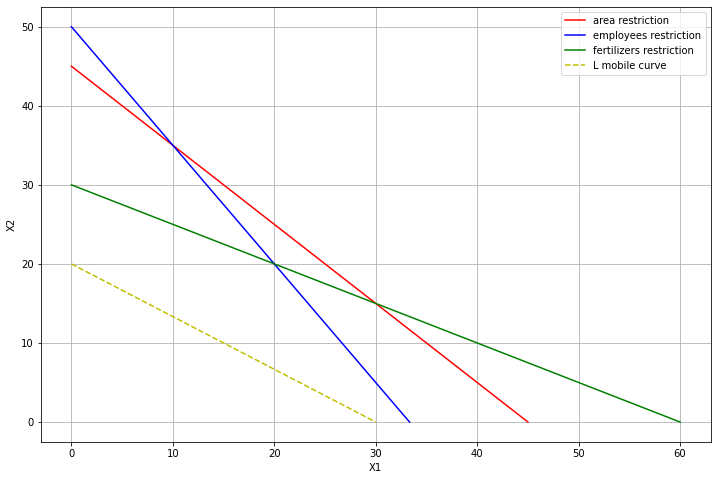

In [3]:
# Aumenta o tamanho do gráfico na proporção 8:5
plt.figure(figsize=(12,8))


# Area restriction
# x2 = -x1 + 45

x1a = [0,45]
x2a = [45,0]

plt.plot(x1a,x2a, 'r', label='area restriction')

# Employees restriction
# x2 = -1.5*x1 + 50

x1e = [0,33.33]
x2e = [50,0]

plt.plot(x1e,x2e, 'b', label='employees restriction')

# Fertilizers restriction
# x2 = -0.5*x1 + 30

x1f = [0,60]
x2f = [30,0]

plt.plot(x1f,x2f, 'g', label='fertilizers restriction')

# Level curve
# x2 = -(2/3))*x1 + L/(300)
# para L = 6,000

x1L = [0,30]
x2L = [20,0]

plt.plot(x1L,x2L, 'y--', label='L mobile curve')



# Legenda para o eixo X:
plt.xlabel('X1')

# Leganda para o eixo Y:
plt.ylabel('X2')

plt.grid() 
plt.legend()

Imagining parallel lines to the "L" line, we can imagine that the last point at which it will meet the boundary of the figure formed by the other 3 lines is something close to (20.20).

Now, we know from the theorem, that *the optimal solution of a linear optimization problem, if it exists, is at a vertex of the polygon formed by the restrictions*.

### Dynamic

In [46]:
def move(L):
    plt.figure(figsize=(8,6))

    x1a = [0,45]
    x2a = [45,0]
    plt.plot(x1a,x2a, 'r', label='area restriction')

    x1e = [0,33.33]
    x2e = [50,0]
    plt.plot(x1e,x2e, 'b', label='employees restriction')

    x1f = [0,60]
    x2f = [30,0]
    plt.plot(x1f,x2f, 'g', label='fertilizers restriction')

    # Level curve
    # x2 = -(2/3))*x1 + L/(300)
    # para L = 6,000
    x1 = np.linspace(0, 60, 15)
    x2 = L/300 + (-2/3)*x1

    plt.plot(x1,x2, 'y--', label='L mobile curve')

    # Legenda para o eixo X:
    plt.xlabel('X1')

    # Leganda para o eixo Y:
    plt.ylabel('X2')
    
    plt.ylim(0, 50)
    plt.xlim(0, 60)
    plt.grid() 
    plt.legend()
    
# Parameter's Control    
gbm_controls = widgets.interactive(move, 
                                   L=widgets.IntSlider(min=1000, max=20000, step=500, value=1))
# Display
display(gbm_controls)

interactive(children=(IntSlider(value=1000, description='L', max=20000, min=1000, step=500), Output()), _dom_c…

### Let's approach the problem analytically...

In [4]:
#%pip install pulp
import pulp

In [5]:
# Definindo o problema como de maximização
prob = pulp.LpProblem('The_Farm_Problem', pulp.LpMaximize)


# Definindo as variáveis de decisão
x1 = pulp.LpVariable('corn', lowBound=0, cat='Continuous')
x2 = pulp.LpVariable('beans', lowBound=0, cat='Continuous')

#Definindo a função Objetivo
L=200*x1+300*x2

#Add a função-objetivo
prob += L

#Restrição
employees=3*x1+2*x2

#Add restrição 
prob += (employees<=100)


#Restrição
fertilizers=2*x1+4*x2

#Add restrição 
prob += (fertilizers<=120)


#Restrição
area=x1+x2

#Add restrição 
prob += (area<=45)


#escrevendo o problema de otimização linear
print (prob)

# Resolvendo o problema 
optimization_result = prob.solve()

# Verificando se a solução ótima foi encontrada
assert optimization_result == pulp.LpStatusOptimal

#mostrando o resultado
for var in (x1, x2):
    print('The optimal production should be {}: {:1.0f}'.format(var.name, var.value()))

The_Farm_Problem:
MAXIMIZE
300*beans + 200*corn + 0
SUBJECT TO
_C1: 2 beans + 3 corn <= 100

_C2: 4 beans + 2 corn <= 120

_C3: beans + corn <= 45

VARIABLES
beans Continuous
corn Continuous

The optimal production should be corn: 20
The optimal production should be beans: 20


# Conclusion

As the maximum profit (20.20), we should plant 20 hectares of land with corn and 20 hectares of land with beans.

With that we will earn a profit of:
    
$    200*20 + 300*20 = 10,000  $

### Examples

In [3]:
def squareit(n):
    return n*n

In [4]:
squareit(5)

25

In [5]:
widgets.interact(squareit, n=(0,100))

interactive(children=(IntSlider(value=50, description='n'), Output()), _dom_classes=('widget-interact',))

<function __main__.squareit(n)>

In [34]:
def show_gbm(a, b):
    x = np.linspace(-100, 100, 50)
    y = a + b*x
    plt.plot(x,y)
    plt.ylim(-100, 100)
    plt.xlim(-100, 100)
    plt.grid() 

In [35]:
gbm_controls = widgets.interactive(show_gbm, 
                                   a=widgets.IntSlider(min=1, max=10, step=1, value=1),
                                   b=widgets.IntSlider(min=-10, max=10, step=1, value=1))

In [36]:
display(gbm_controls)

interactive(children=(IntSlider(value=1, description='a', max=10, min=1), IntSlider(value=1, description='b', …